# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
#ds
display(ds)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
# Most expensive house and address
df = pd.DataFrame(ds)

#isolate the row with the max price and store into address and price
dfMax = df.loc[[df['price'].idxmax()]]
address = dfMax["address"]
price = dfMax["price"].max()

print("The house with the address " + address  + " $" + str(price))
print(price)

#display(df[df['address'] == 'El Escorial']['price'].max())

13110    The house with the address El Escorial $8500000
Name: address, dtype: object
8500000


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
# Most cheap house 
dfMininum = pd.DataFrame(ds)

#Isolate minimum row
dfMin = dfMininum.loc[dfMininum["price"].idxmin()]

minAddress = dfMin['address']
dfminprice = dfMin["price"].min()



print("The house with address " + minAddress + " is the cheapest and its price is " + str(dfminprice) + " USD")
#print(df['price'].min())


The house with address Parla is the cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# Print address and surface 
dfSize = pd.DataFrame(ds)

#Biggest
dfBiggest = dfSize.loc[df["surface"].idxmax()]
Biggest = dfBiggest["surface"]
biggestAddress = dfBiggest["address"]

#Smallest
dfSmallest = dfSize.loc[df["surface"].idxmin()]
Smallest = dfSmallest["surface"]
smallestAddress = dfSmallest["address"]

print("The biggest house is located on " + biggestAddress + " and its surface is " + str(Biggest) + " meters")
print("The smallest house is located on " + smallestAddress + " and its surface is " + str(Smallest) + " meters")

The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
# Print level5
population = df["level5"].drop_duplicates().to_list()
print(population)
print(str(len(population)) + ' total populations')


['Arganda del Rey', 'Fuenlabrada', 'Boadilla del Monte', 'Las Rozas de Madrid', ' Madrid Capital', 'Villaviciosa de Odón', 'Pinto', 'Valdemoro', 'Navalcarnero', 'Pozuelo de Alarcón', 'Torrejón de Ardoz', 'Navalagamella', 'San Sebastián de los Reyes', 'Rivas-vaciamadrid', 'Alpedrete', 'Móstoles', 'San Fernando de Henares', 'Coslada', 'Becerril de la Sierra', 'Alcalá de Henares', 'Chinchón', 'Parla', 'Alcorcón', 'El Escorial', 'Leganés', 'Pedrezuela', 'Majadahonda', 'Villanueva de la Cañada', 'Villanueva del Pardillo', 'Torrelodones', 'Moralzarzal', 'Mejorada del Campo', 'Aranjuez', 'Corpa', 'Getafe', 'Velilla de San Antonio', 'Sevilla la Nueva', 'San Martín de la Vega', 'Villalbilla', 'Collado Villalba', 'Alcobendas', 'El Molar (Madrid)', 'Moraleja de Enmedio', 'Algete', 'Campo Real', 'Torrejón de la Calzada', 'Colmenar Viejo', 'Valdemorillo', 'Fuente El Saz de Jarama', 'Tres Cantos', 'Arroyomolinos (Madrid)', 'Griñón', 'Paracuellos de Jarama', 'Guadarrama', 'Titulcia', 'Galapagar', 'Co

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
# Does data contain NA
#rows
dfNull = pd.DataFrame(ds)
#nullValues = dfNull[dfNull.any(axis=1)].isna()
nullValues = dfNull.isna()

display(nullValues)




,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
# take nullValues df and drop NA
df_non_null = pd.DataFrame(ds)
non_null_values = df_non_null.dropna()
new = non_null_values.isna()
display(nullValues)
display(new)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
15333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [9]:
# TODO
import numpy as np

meanPrices = df.loc[df["level5"] == "Arroyomolinos (Madrid)"]["price"]

print(meanPrices.mean())

    



294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

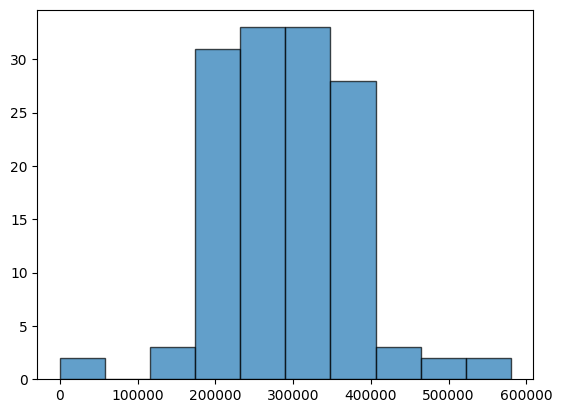

In [10]:
# TODO: Code
import matplotlib.pyplot as plt

plt.hist(meanPrices, bins= 10, alpha=0.7, edgecolor="black")
plt.show()

#I observe that the majority of the prices are distributed within 
#200,000 - 400,000

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [11]:
# TODO

meanVal = df.loc[df["level5"] == "Valdemorillo"]["price"].mean()
meanGal = df.loc[df["level5"] == "Galapagar"]["price"].mean()

print(meanVal)
print(meanGal)

print("Valdemorillo mean is larger than Galapagar prices")


363860.2931034483
360063.20238095237
Valdemorillo mean is larger than Galapagar prices


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [12]:
# Get price per square meter average
meters = np.pow(df["surface"], 2)
df["pps"] = df["price"]/ meters
#df["pps"].mean()

#Create meanVal for Val and Gal
meanValPPS = df.loc[df["level5"] == "Valdemorillo"]["pps"].mean().item()
meanGalPPS = df.loc[df["level5"] == "Galapagar"]["pps"].mean().item()

#Compare prices per square meter to average for Val and Galapagar
if meanValPPS > meanValPPS:
    print("Valdemorillo pps is larger than Galapagar pps")
else:
    print("Galapagar pps is larger than Valdemorillo pps")

Galapagar pps is larger than Valdemorillo pps


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

There is no correlation between the surface and the price 

       surface   price
0        103.0  195000
1          NaN   89000
2         99.0  390000
3         86.0   89000
4        106.0  172000
...        ...     ...
15330     96.0  259470
15331    150.0  165000
15332    175.0  495000
15333    101.0  195000
15334    152.0  765000

[15335 rows x 2 columns]


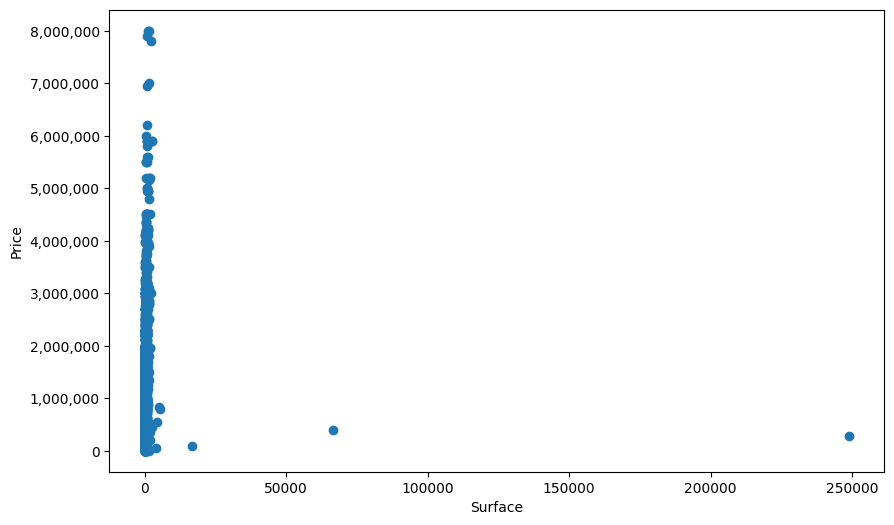

Conclusion: There is no correlation between price and surface


In [13]:
# Surface 
fig, ax = plt.subplots(figsize=(10, 6))
surface = df["surface"]
price = df["price"]

print(df[["surface", "price"]])
plt.scatter(df['surface'], df['price'])
plt.xlabel("Surface")
plt.ylabel("Price")
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #convert out of scientific notation


plt.show()
print("Conclusion: There is no correlation between price and surface")

#Price

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [14]:
# TODO

counts = df["realEstate_name"].value_counts().sum()
print('The dataset contains ' + str(counts) + ' agencies')


The dataset contains 15325 agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [15]:
#get value counts series and isolate max to get number of houses
pop = df['level5'].value_counts()
maxmimumPop = pop.max()

#use idxmax for the population name
popLvl = pop.idxmax()
print(popLvl)
print(maxmimumPop)



 Madrid Capital
6643


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [16]:
# Create a list of the level 5 values and create df
lvl5 = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df2 = df[df['level5'].isin(lvl5)]

display(df2)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,12.033532
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,42.800000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,22.222222
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,21.077167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,22.682446
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,23.057851
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,23.529412
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,13.524937


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

Fuenlabrada has the highest median price followed by Leganes, Getafe, and Alcoron

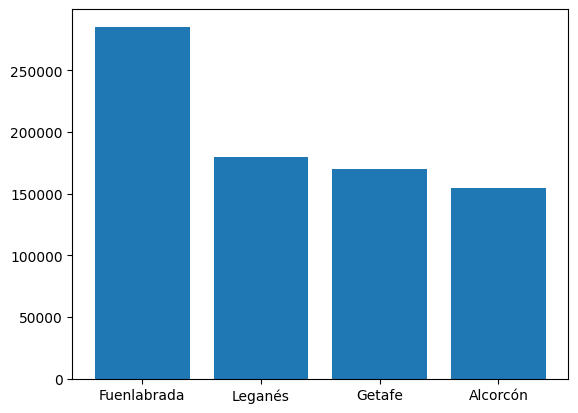

I observe that Getafe has the highest median price


In [17]:
# Get median 
medianPrice = df2.groupby('level5')['price'].median().sort_values(ascending=False)
bar = medianPrice
barPlot = plt.bar(lvl5, medianPrice)
plt.show()

print('I observe that Getafe has the highest median price')

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [18]:
# Use df2
house = ['price', 'rooms', 'surface', 'bathrooms']

for col in house:
    mean = df2[col].mean()
    var = df2[col].var()
    print("The mean for " + col + " is " + str(mean)) 
    print("The variance for " + col + " is " + str(var))# ": " + str(mean))
    #print("The variance is " + str(var))

#stats for price
#meanPrice = df2['price'].mean()
#varPrice = df2['price'].var()
#print("The mean price is " + str(meanPrice) + ' and the variance is ' + str(varPrice))

#stats for rooms
#meanRooms = df2['rooms'].mean()
#varRooms = df2['rooms'].var()
#print("The mean rooms is " + str(meanRooms) + ' and the variance is ' + str(varRooms))
#print(df2.columns)

#stats for surfacearea
#meanSurface = df2['surface'].mean()
#varSurface = df2['surface'].var()
#print("The mean surface area is " + str(meanSurface) + ' and the variance is ' + str(varSurface))

#stats for rooms
#meanBathrooms = df2['bathrooms'].mean()
#varBathroom = df2['bathrooms'].var()
#print("The mean bathroom is " + str(meanBathrooms) + ' and the variance is ' + str(varBathroom))

The mean for price is 223094.48070562293
The variance for price is 14921367508.04902
The mean for rooms is 3.0177383592017737
The variance for rooms is 0.7188858892927542
The mean for surface is 111.75222363405337
The variance for surface is 4263.051760316337
The mean for bathrooms is 1.633221850613155
The variance for bathrooms is 0.5717968625577321


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [19]:
# most expensive house using max 
mostExpensive = df2.groupby('level5')['price'].max()
print(mostExpensive)
#mostExpensiveAddress = df2.loc[df2[mostExpensive][df2['address']]]

#print(mostExpensive, mostExpensiveAddress)

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

/tmp/ipykernel_1354/1737816978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zNormal'] = zScore(meanZ, stdZ)
/tmp/ipykernel_1354/1737816978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zNormal'] = zScore(meanZ, stdZ)
/tmp/ipykernel_1354/1737816978.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

level5
Alcorcón       0.0
Fuenlabrada    0.0
Getafe         0.0
Leganés        0.0
Name: zNormal, dtype: float64

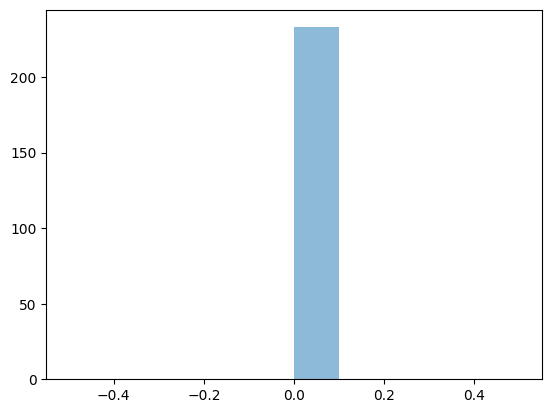

In [69]:
# calculate mean and std for z score normalization 
def zScore(meanPrice, stdPrice):
   mean = df2['price'].mean()
   std = df2['price'].std()
   znormal = (df2['price'] - meanPrice) / stdPrice
   return znormal

for i in df2['level5']:
   meanZ = df2[df2['level5'] == i]['price']
   stdZ = df2[df2['level5'] == i]['price']
   df2['zNormal'] = zScore(meanZ, stdZ)
 

# # plot histograms for each population
# fig, ax = plt.subplots(figsize=(10, 6))

# for level5 in df2['level5']:
plt.hist(df2['zNormal'], bins=10, alpha =0.5)
   


display(df2.groupby('level5')['zNormal'].sum())



**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [21]:
# isolate Getafe 
#display(df2[['pps','level5']])
getafe = df2[df2['level5'] == 'Getafe']['pps'].mean()
alcoron = df2[df2['level5'] == 'Alcorcón']['pps'].mean()
print(getafe)
print(alcoron)

print('The town of Alcorcón has higher average price per square meter than Getafe')

20.52983722747174
25.007911796853072
The town of Alcorcón has higher average price per square meter than Getafe


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

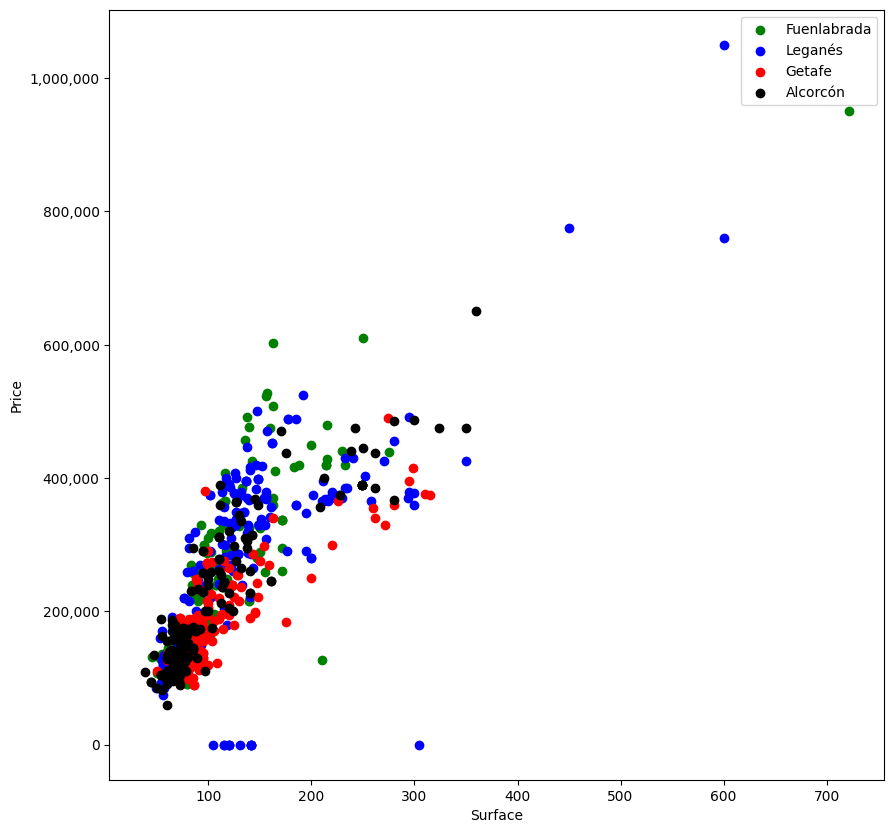

169      290000
232      137400
233      135500
269       99900
381      455000
          ...  
14999    365000
15002    284491
15034    447000
15087    356160
15117    412500
Name: price, Length: 290, dtype: int64


In [22]:
#use df2 and create 4 subploits
fig, axs = plt.subplots(figsize=(10, 10))
Alcoron = df2.loc[df2['level5'] == 'Alcorcón']
axs.scatter(Alcoron['surface'], Alcoron['price'], color = 'green')


#Getafe
Getafe = df2.loc[df2['level5'] == 'Getafe']
axs.scatter(Getafe['surface'], Getafe['price'], color = 'blue')


#Fuenlabrada
Fuenlabrada = df2.loc[df2['level5'] == 'Fuenlabrada']
axs.scatter(Fuenlabrada['surface'], Fuenlabrada['price'], color = 'red')

#leganes
leganes = df2.loc[df2['level5'] == 'Leganés']
axs.scatter(leganes['surface'], leganes['price'], color = 'black')

#plot labels and legend/convert y axis to non scientific notation
axs.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #convert out of scientific notation
axs.set_xlabel('Surface')
axs.set_ylabel('Price')
axs.legend(lvl5)

plt.show()

print(df2[df2['level5'] == 'Getafe']['price'])


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

/tmp/ipykernel_1354/1374937887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['geometry'] = gpd.points_from_xy(longitude, latitude)


1        POINT (-3.79351 40.28674)
3        POINT (-3.79508 40.28538)
85       POINT (-3.82693 40.35059)
94       POINT (-3.77574 40.31933)
109      POINT (-3.83139 40.33134)
                   ...            
15275    POINT (-3.83733 40.31381)
15291    POINT (-3.76318 40.32591)
15305    POINT (-3.80986 40.28822)
15322    POINT (-3.78892 40.28282)
15325    POINT (-3.79869 40.28062)
Name: geometry, Length: 907, dtype: geometry


<Axes: >

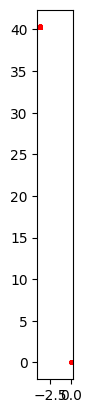

In [46]:
import geopandas as gpd

#Create gpd dataframe

latitude = df2['latitude']
longitude = df2['longitude']
df2['geometry'] = gpd.points_from_xy(longitude, latitude)
print(df2['geometry'])

gpd.GeoDataFrame(df2, geometry='geometry')

df2gpd = gpd.GeoDataFrame(df2, geometry = 'geometry')
df2gpd.plot(marker = 'o', color ='red', markersize =5)

NameError: name 'gdf' is not defined

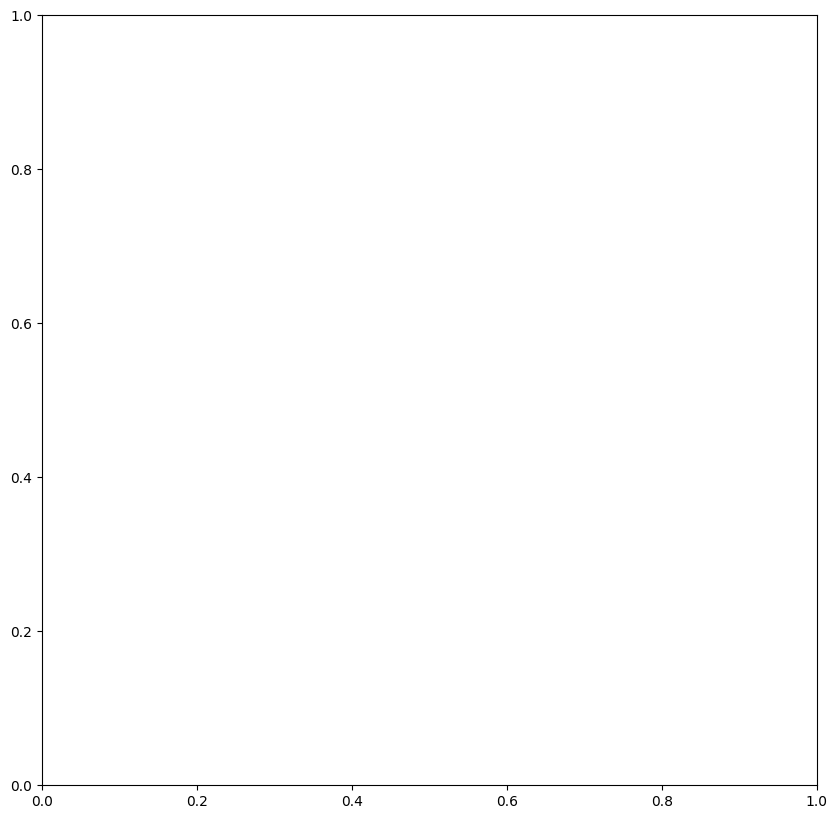

In [24]:


## HERE: plot the coordinates of the estates


# Load the GeoDataFrame


# Plot the GeoDataFrame


# Add title and labels


# Show the plot

